# How fast are NumPy operations compared to regular Python math?
#### In this brief notebook, we will create a list of 1-million random floating point numbers. Then we will use *for* loop to iterate over its elements, take Log10 and store the value in another list. We'll compare the execution speed with that of a direct NumPy Log10 operation

You will often come across this assertion in the data science and Python community that NumPy is much faster due to its vectorized implementation and due to the fact that many of its core routines are written in C (based on CPython framework).

And it is indeed true. 

Numpy arrays are densely packed arrays of homogeneous type. Python lists, by contrast, are arrays of pointers to objects, even when all of them are of the same type. So, you get the benefits of locality of reference. Also, many Numpy operations are implemented in C, avoiding the general cost of loops in Python, pointer indirection and per-element dynamic type checking. The speed boost depends on which operations you’re performing. 

For data science and modern machine learning tasks, this is an invaluable advantage, as often the data set size runs into millions if not billions of records.

In [1]:
import numpy as np


In [2]:
import numpy as np
from math import log10 as lg10
import time
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [3]:
N = 1000000 # Number of records to process
speed = [] # Empty list to store operation speeds (time taken)

#### Create a list of 1 million numbers

In [4]:
l1 = list(100*(np.random.random(N))+1)
print("Length of l1:",len(l1))

Length of l1: 1000000


In [5]:
print("First few elements of the array:", l1[:4])

First few elements of the array: [37.3633827483866, 33.33808233281209, 81.12460573044667, 46.86194445576754]


#### Create a NumPy ndarray object from that list i.e. vectorize it

In [6]:
a1 = np.array(l1)

In [7]:
print("Shape of a1 object:",a1.shape)
print("Type of a1 object:",type(a1))

Shape of a1 object: (1000000,)
Type of a1 object: <class 'numpy.ndarray'>


#### Create a blank list for appending elements

In [8]:
l2=[] # Just a blanck list to append to

### How fast is - For loop and appending

In [9]:
t1=time.time()
for item in l1:
    l2.append(lg10(item))
t2 = time.time()
print("With for loop and appending it took {} seconds".format(t2-t1))
speed.append(t2-t1)

With for loop and appending it took 0.12505054473876953 seconds


In [10]:
print("First few elements of the resulting array:", l2[:4])

First few elements of the resulting array: [1.572446188822831, 1.522940614801213, 1.9091525991211222, 1.670820304937215]


### How fast it - List comprehension

In [11]:
t1=time.time()
l2 = [lg10(i) for i in range(1,1000001)]
t2 = time.time()
print("With list comprehension, it took {} seconds".format(t2-t1))
speed.append(t2-t1)

With list comprehension, it took 0.09929847717285156 seconds


In [12]:
print("First few elements of the resulting array:", l2[:4])

First few elements of the resulting array: [0.0, 0.3010299956639812, 0.47712125471966244, 0.6020599913279624]


### How fast is - *Map* function method

In [13]:
def op1(x):
    return (lg10(x))

In [14]:
t1=time.time()
l2=list(map(op1,l1))
t2 = time.time()
print("With map functional method it took {} seconds".format(t2-t1))
speed.append(t2-t1)

With map functional method it took 0.10991692543029785 seconds


In [15]:
print("First few elements of the resulting array:", l2[:4])

First few elements of the resulting array: [1.572446188822831, 1.522940614801213, 1.9091525991211222, 1.670820304937215]


### How fast is - NumPy operation (vectorized array)

In [16]:
t1=time.time()
a2=np.log10(a1)
t2 = time.time()
print("With direct NumPy log10 method it took {} seconds".format(t2-t1))
speed.append(t2-t1)

With direct NumPy log10 method it took 0.008664846420288086 seconds


In [17]:
l3 = list(a2)
print("First few elements of the resulting array:", l3[:4])

First few elements of the resulting array: [1.572446188822831, 1.522940614801213, 1.9091525991211222, 1.670820304937215]


### Plot the time taken by each operation

TypeError: bar() missing 1 required positional argument: 'x'

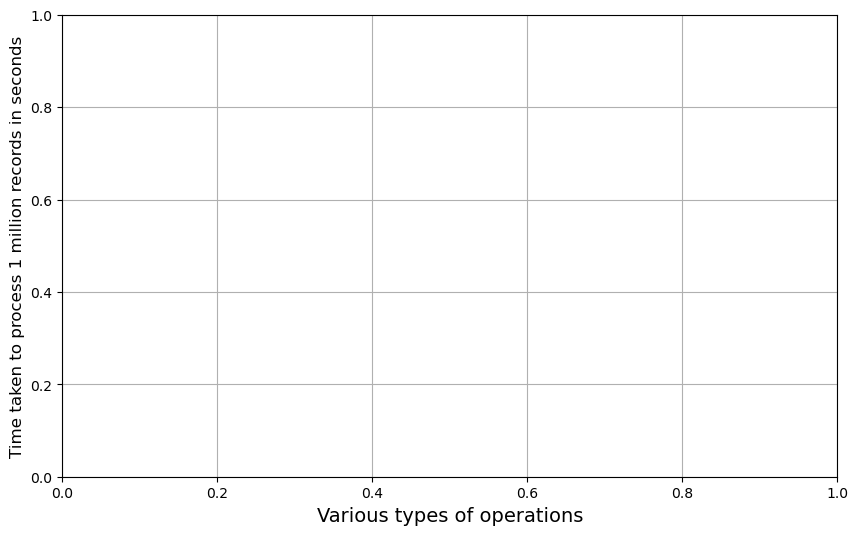

In [18]:
plt.figure(figsize=(10,6))
plt.ylabel("Time taken to process 1 million records in seconds",fontsize=12)
plt.xlabel("Various types of operations",fontsize=14)
plt.grid(True)
plt.bar(left=[1,2,3,4],height=speed, align='center',tick_label=['For-loop','List comprehension','Map function','NumPy'])

### Therefore, we see the evidence that NumPy operations over ndarray objects are much faster than regular Python math operations over corresponding list. The exact speed of regular Python operations vary a little but they are always much slower compared to the vectorized NumPy operation.